#DECISION TREE

Decision Tree on Kyphosis Dataset:
Accuracy: 0.6471

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.29      0.67      0.40         3

    accuracy                           0.65        17
   macro avg       0.59      0.65      0.57        17
weighted avg       0.79      0.65      0.69        17


Confusion Matrix:
[[9 5]
 [1 2]]


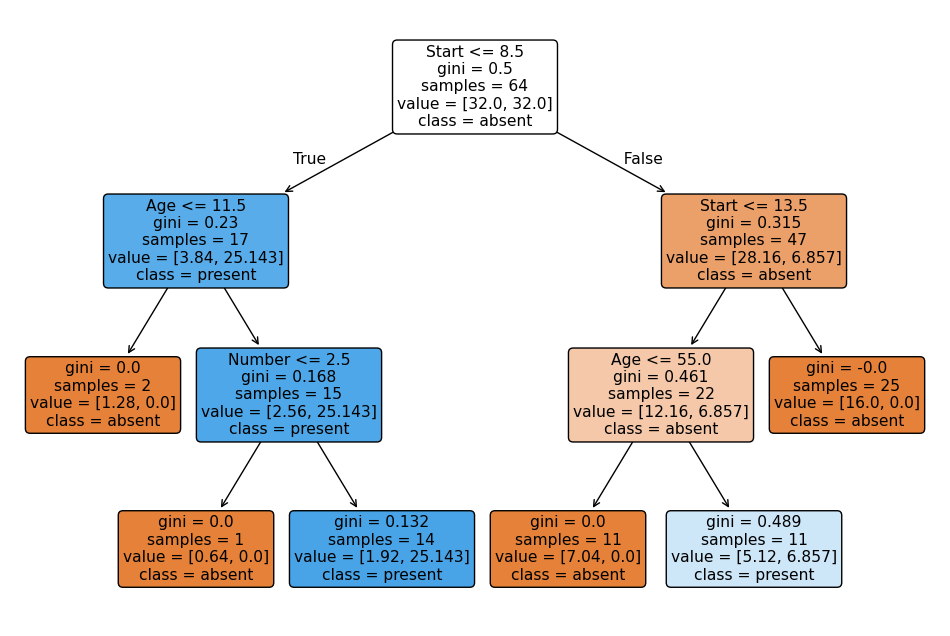

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the kyphosis dataset into a new DataFrame called kyphosis_df
kyphosis_df = pd.read_csv("kyphosis.csv")

# Features and target
X = kyphosis_df[['Age', 'Number', 'Start']]  # Use kyphosis_df instead of df
y = kyphosis_df['Kyphosis'].map({'present': 1, 'absent': 0})  # Use kyphosis_df instead of df

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(max_depth=3, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Decision Tree on Kyphosis Dataset:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['absent', 'present'], filled=True, rounded=True)  # Now 'model' is the correct type
plt.show()

#RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("kyphosis.csv")

# Features and target
X = df[['Age', 'Number', 'Start']]
y = df['Kyphosis'].map({'present': 1, 'absent': 0})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Random Forest on Kyphosis Dataset:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)

Random Forest on Kyphosis Dataset:
Accuracy: 0.7647

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.00      0.00      0.00         3

    accuracy                           0.76        17
   macro avg       0.41      0.46      0.43        17
weighted avg       0.67      0.76      0.71        17


Confusion Matrix:
[[13  1]
 [ 3  0]]


#NAIVE BAYES

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("kyphosis.csv")

# Features and target
X = df[['Age', 'Number', 'Start']]
y = df['Kyphosis'].map({'present': 1, 'absent': 0})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Naive Bayes
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Naive Bayes on Kyphosis Dataset:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)

Naive Bayes on Kyphosis Dataset:
Accuracy: 0.7647

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.00      0.00      0.00         3

    accuracy                           0.76        17
   macro avg       0.41      0.46      0.43        17
weighted avg       0.67      0.76      0.71        17


Confusion Matrix:
[[13  1]
 [ 3  0]]


#K MEANS

K-Means:
Silhouette Score: 0.7357


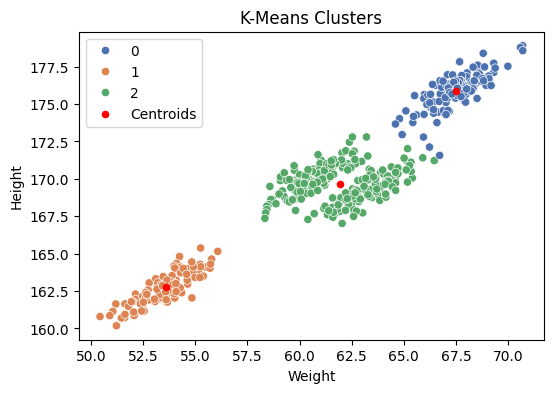

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and standardize data
df = pd.read_csv("Clustering_Data.csv")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Metrics
silhouette = silhouette_score(X_scaled, labels)

print("K-Means:")
print(f"Silhouette Score: {silhouette:.4f}")

# Visualize clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["Weight"], y=df["Height"], hue=labels, palette="deep")
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=20, label="Centroids")
plt.title("K-Means Clusters")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.legend()
plt.show()

#HIERARCHIAL

Hierarchical Clustering:
Silhouette Score: 0.7347


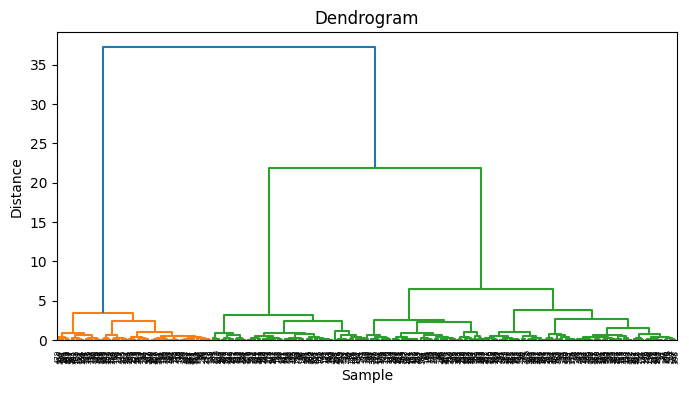

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Load and standardize data
df = pd.read_csv("Clustering_Data.csv")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
labels = hierarchical.fit_predict(X_scaled)

# Metrics
silhouette = silhouette_score(X_scaled, labels)

print("Hierarchical Clustering:")
print(f"Silhouette Score: {silhouette:.4f}")

# Visualize Dendrogram
plt.figure(figsize=(8, 4))
Z = linkage(X_scaled, method="ward")
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Sample")
plt.ylabel("Distance")
plt.show()

#DB SCAN

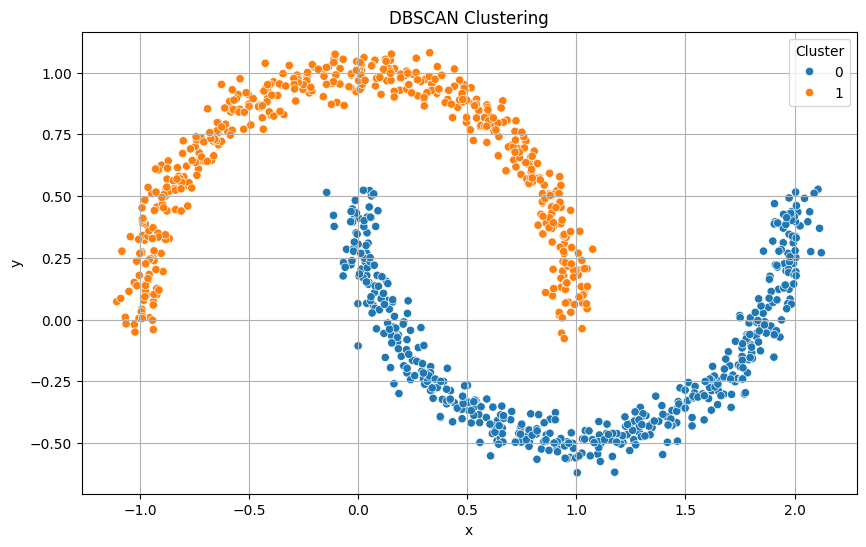

In [ ]:
#db scan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("dbscan_friendly_clustering_dataset.csv")

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Add labels to the DataFrame
df["cluster"] = labels

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="x", y="y", hue="cluster", palette="tab10", legend="full")
plt.title("DBSCAN Clustering")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

#APRIORI

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load the dataset
df = pd.read_csv("Groceries_dataset.csv")

# Group items by Member_number and Date to form transactions
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transaction_list = transactions['itemDescription'].tolist()

# One-hot encode transactions
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(transaction_df, min_support=0.002, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# Filter rules with confidence >= 0.1
rules = rules[rules['confidence'] >= 0.1]

# Sort rules by lift (descending) and select top 10
rules = rules.sort_values(by='lift', ascending=False).head(10)

# Print results
print("Frequent Itemsets:")
print(frequent_itemsets.head(10))
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Frequent Itemsets:
    support                 itemsets
0  0.004010  (Instant food products)
1  0.021386               (UHT-milk)
2  0.008087          (baking powder)
3  0.033950                   (beef)
4  0.021787                (berries)
5  0.016574              (beverages)
6  0.045312           (bottled beer)
7  0.060683          (bottled water)
8  0.002540                 (brandy)
9  0.037626            (brown bread)

Association Rules:
                 antecedents         consequents   support  confidence  \
185            (frankfurter)  (other vegetables)  0.005146    0.136283   
114              (chocolate)        (rolls/buns)  0.002807    0.118980   
196           (frozen meals)  (other vegetables)  0.002139    0.127490   
242                   (meat)  (other vegetables)  0.002139    0.126984   
224                    (ham)        (whole milk)  0.002740    0.160156   
11                 (berries)  (other vegetables)  0.002673    0.122699   
215  (fruit/vegetable juice)        